In [1]:
#Sean Ritchie
#Project 3
#CS 4990
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from keras.models import Model, load_model
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
from skimage.morphology import label

Using TensorFlow backend.


In [4]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TEST_PATH = 'input/Testing/'
test_ids = next(os.walk(TEST_PATH))[2]

X_test = np.zeros((len(test_ids)+1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
for n in range(1, 928):
    print(n)
    path = TEST_PATH
    img = imread(path + 'test_img_' + str(n) + '.jpg')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

X_test = X_test[1:]
print(len(X_test))
print('done')

StopIteration: 

In [3]:
# Define IoU metric
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [5]:
model = load_model('models/model2.h5', custom_objects={'mean_iou': mean_iou})
preds_test = model.predict(X_test, verbose=1)

preds_test_t = (preds_test > 0.5).astype(np.uint8)
print(len(preds_test))
# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(927):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))
print('done')

OSError: Unable to open file (unable to open file: name = 'models/model2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [21]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)

new_test_ids = []
#rles_ = []
encodings = []
#for n, id_ in enumerate(test_ids):
#    id = id_.replace("img", "mask")
#    rle = list(prob_to_rles(preds_test_upsampled[n]))
#    rles_.extend(rle)
    #new_test_ids.extend([id] * len(rle))

#for n, mask in enumerate(preds_test_upsampled):
#    name = test_ids[n].replace("img", "mask")
#    rle = list(prob_to_rles(preds_test_upsampled[n]))
#    encodings.append(rle)
#    new_test_ids.append(name)
    #new_test_ids.extend([id] * len(rle))
#print (encodings)
for n, mask in enumerate(preds_test_upsampled):
    name = "test_mask_"+str(n+1)
    print(name)
    mask = np.round(np.array(mask)).astype(np.uint8)
    encodings.append(rle_encoding(mask))
    new_test_ids.append(name)
print('done')

test_mask_1
test_mask_2
test_mask_3
test_mask_4
test_mask_5
test_mask_6
test_mask_7
test_mask_8
test_mask_9
test_mask_10
test_mask_11
test_mask_12
test_mask_13
test_mask_14
test_mask_15
test_mask_16
test_mask_17
test_mask_18
test_mask_19
test_mask_20
test_mask_21
test_mask_22
test_mask_23
test_mask_24
test_mask_25
test_mask_26
test_mask_27
test_mask_28
test_mask_29
test_mask_30
test_mask_31
test_mask_32
test_mask_33
test_mask_34
test_mask_35
test_mask_36
test_mask_37
test_mask_38
test_mask_39
test_mask_40
test_mask_41
test_mask_42
test_mask_43
test_mask_44
test_mask_45
test_mask_46
test_mask_47
test_mask_48
test_mask_49
test_mask_50
test_mask_51
test_mask_52
test_mask_53
test_mask_54
test_mask_55
test_mask_56
test_mask_57
test_mask_58
test_mask_59
test_mask_60
test_mask_61
test_mask_62
test_mask_63
test_mask_64
test_mask_65
test_mask_66
test_mask_67
test_mask_68
test_mask_69
test_mask_70
test_mask_71
test_mask_72
test_mask_73
test_mask_74
test_mask_75
test_mask_76
test_mask_77
test_mas

test_mask_597
test_mask_598
test_mask_599
test_mask_600
test_mask_601
test_mask_602
test_mask_603
test_mask_604
test_mask_605
test_mask_606
test_mask_607
test_mask_608
test_mask_609
test_mask_610
test_mask_611
test_mask_612
test_mask_613
test_mask_614
test_mask_615
test_mask_616
test_mask_617
test_mask_618
test_mask_619
test_mask_620
test_mask_621
test_mask_622
test_mask_623
test_mask_624
test_mask_625
test_mask_626
test_mask_627
test_mask_628
test_mask_629
test_mask_630
test_mask_631
test_mask_632
test_mask_633
test_mask_634
test_mask_635
test_mask_636
test_mask_637
test_mask_638
test_mask_639
test_mask_640
test_mask_641
test_mask_642
test_mask_643
test_mask_644
test_mask_645
test_mask_646
test_mask_647
test_mask_648
test_mask_649
test_mask_650
test_mask_651
test_mask_652
test_mask_653
test_mask_654
test_mask_655
test_mask_656
test_mask_657
test_mask_658
test_mask_659
test_mask_660
test_mask_661
test_mask_662
test_mask_663
test_mask_664
test_mask_665
test_mask_666
test_mask_667
test_m

In [13]:
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(encodings).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('model.csv', index=False)

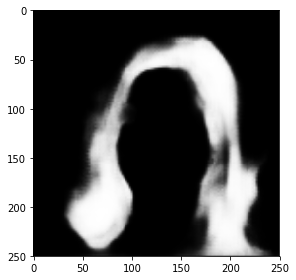

test_mask_1


AttributeError: 'list' object has no attribute 'astype'

In [15]:
print
imshow(np.squeeze(preds_test_upsampled[0]))
plt.show()
print(new_test_ids[0])
print(rle_encoding(np.round(np.array(preds_test_upsampled[0]))).astype(np.uint8))



In [30]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)
n=0
masks = pd.read_csv('model.csv')
for r in masks.itertuples():
    print(n)
    print(np.round(np.array(preds_test_upsampled[0])).astype(np.uint8))
    print(rle_decode(r.EncodedPixels,(128,128)))
    n+=1

0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
4
[[0 0 0 ... 0 0 0]
 [0 0 0 ...

AttributeError: 'float' object has no attribute 'split'